<a href="https://colab.research.google.com/github/chambai/Deep_Learning_Course/blob/main/Week%202%20DL%20Image%20Analysis%201/HorseHumanCnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Images of Horses and Humans Using a CNN
(adapted from https://colab.research.google.com/github/mohnabil2020/machine_learning/blob/master/horse_or_human_classifier.ipynb#scrollTo=AwQbx0_vsDli)

##Uses images from a zip file

Download the zip files containg the images.  The training data ad the test data are stored in 2 separate zip files

In [ ]:
# get the training data zip file from the google API and store it in directory /tmp
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-03-02 13:13:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   161MB/s    in 0.9s    

2021-03-02 13:13:14 (161 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
# get the validation data zip file from the google API and store it in directory /tmp
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-03-02 13:13:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.07s   

2021-03-02 13:13:18 (161 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
# load the libraries
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras

Extract the data

In [ ]:
# extract the training data into a directory
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')

# extract the validation data into a directory
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [ ]:
# Directory with our training horse pictures for training
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures for training
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures for validation
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures for validation
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Explore the data

In [ ]:
# print out the names of the first 10 files to give a nice feeling that the files are arranged as expected
# i.e. images of horses in the horses folder and images of humans in the human folder
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse50-4.png', 'horse11-8.png', 'horse07-1.png', 'horse46-5.png', 'horse36-1.png', 'horse06-2.png', 'horse50-7.png', 'horse11-2.png', 'horse14-3.png', 'horse22-3.png']
['human01-17.png', 'human02-00.png', 'human07-07.png', 'human17-22.png', 'human15-30.png', 'human04-06.png', 'human04-04.png', 'human04-19.png', 'human12-28.png', 'human06-04.png']
['horse6-403.png', 'horse2-112.png', 'horse3-440.png', 'horse3-141.png', 'horse5-076.png', 'horse5-360.png', 'horse2-269.png', 'horse1-105.png', 'horse5-504.png', 'horse4-000.png']
['valhuman05-17.png', 'valhuman05-13.png', 'valhuman03-17.png', 'valhuman04-18.png', 'valhuman03-16.png', 'valhuman01-19.png', 'valhuman04-21.png', 'valhuman04-19.png', 'valhuman03-20.png', 'valhuman03-21.png']


In [ ]:
# print out the number of images in the directories
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


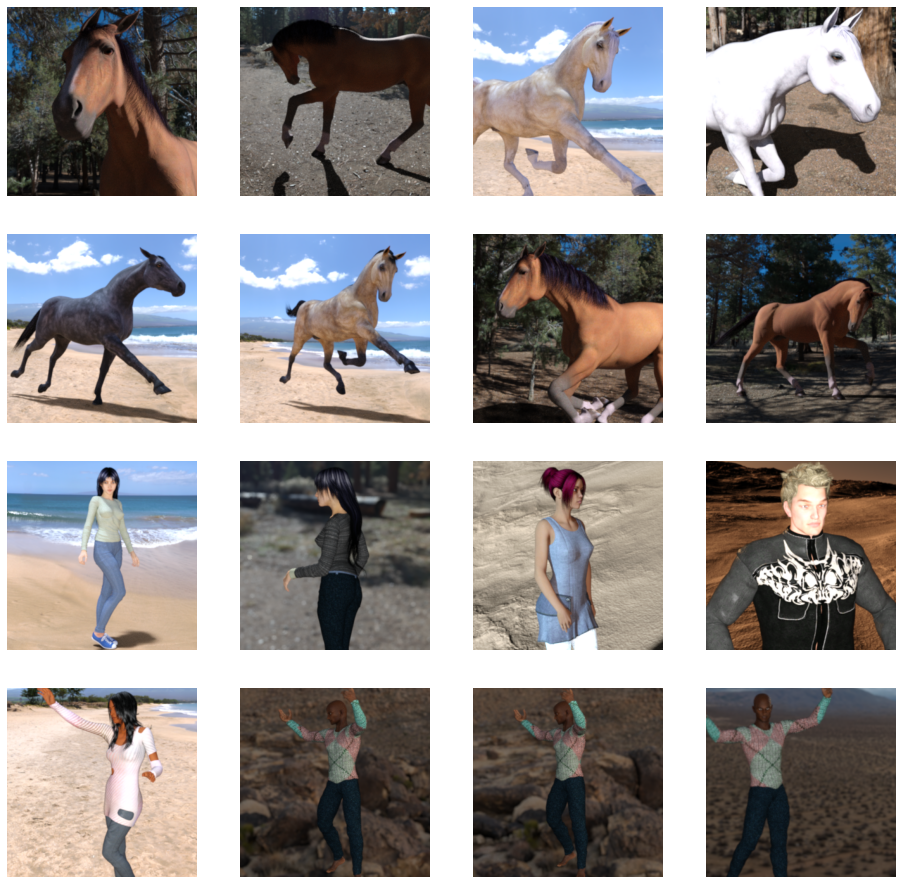

In [ ]:
# display images from the dataset
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
# pick the first 8 horse pictures
#[print(e) for e in myList]
# for e in myList:
#    print(e)
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]

# pick the first 8 human pictures
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

# add the horse and human pictures together in a list and plot in
# the specified number of rows and columns
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Data Preparation.  Normalise the images and re-size them to the same size

In [ ]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1,activation='relu', padding='same', input_shape=(300,300,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 64)       

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit( train_generator,  
                    validation_data = validation_generator,
                    epochs=15
                  )             


Epoch 1/15
33/33 [==============================] - 8s 226ms/step - loss: 0.6111 - accuracy: 0.6364 - val_loss: 1.7001 - val_accuracy: 0.7227
Epoch 2/15
33/33 [==============================] - 7s 219ms/step - loss: 0.2222 - accuracy: 0.9109 - val_loss: 1.8037 - val_accuracy: 0.8203
Epoch 3/15
33/33 [==============================] - 7s 218ms/step - loss: 0.1059 - accuracy: 0.9600 - val_loss: 1.9207 - val_accuracy: 0.8203
Epoch 4/15
33/33 [==============================] - 7s 223ms/step - loss: 0.1032 - accuracy: 0.9560 - val_loss: 1.6933 - val_accuracy: 0.8008
Epoch 5/15
33/33 [==============================] - 7s 222ms/step - loss: 0.0791 - accuracy: 0.9638 - val_loss: 2.0715 - val_accuracy: 0.8281
Epoch 6/15
33/33 [==============================] - 7s 219ms/step - loss: 0.0259 - accuracy: 0.9921 - val_loss: 2.4214 - val_accuracy: 0.8086
Epoch 7/15
33/33 [==============================] - 7s 218ms/step - loss: 0.0329 - accuracy: 0.9883 - val_loss: 3.4564 - val_accuracy: 0.7852
Epoch 

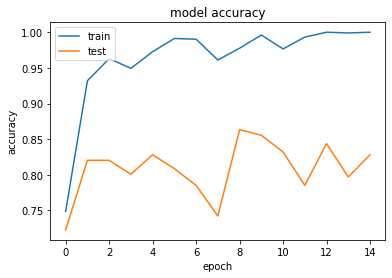

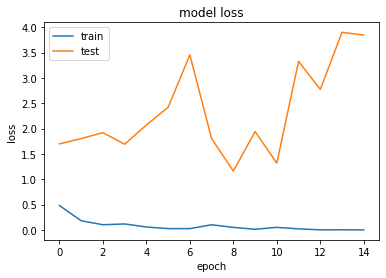

In [ ]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


## You do not need to do this but for a bit of fun let's upload an image from your computer and have it calssified as a horse or human

***hint :*** ( try to use image > 300*300 pixels because this is the minimum pixels for the model ) 


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse.jpg to horse.jpg
[0.]
horse.jpg is a horse


## You do not need to do this either but for a bit more fun, let's visualise what is happening with the image in the hidden layers of the network

**You do not need to understand the code below.**

A visualisation model is created from our original model that makes the hidden layers of our model avaialble.
It takes a random image from the training set, resizes it, normalizes it.  Applies it to the model using the `predict` method.

Loops round the hidden layers of the visualisation model and displays the activations as images


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


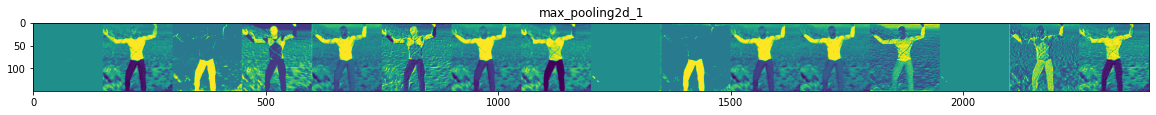

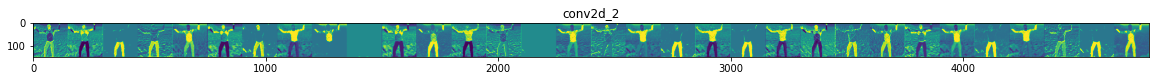

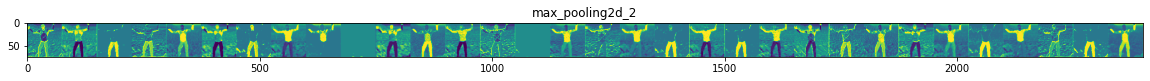

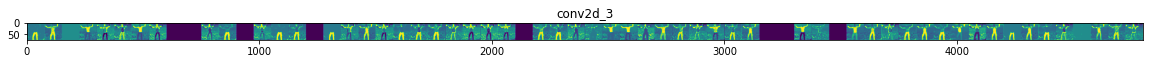

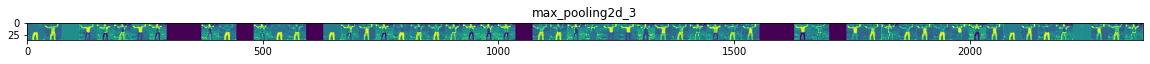

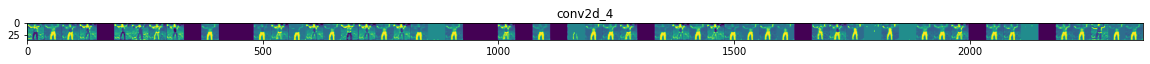

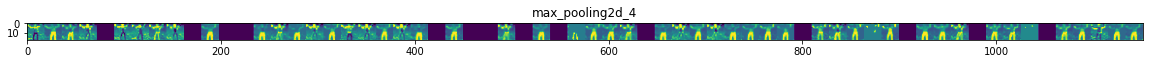

In [ ]:

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
# loops round all of the internal hidden layers
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Reduce overfitting on the model